RF on Loan


=== Extended Random Forest Experiment Results ===

   n_estimators  max_depth  Holdout Accuracy  Holdout Time (s)  \
0            50        NaN            0.9835          0.370700   
1           100        NaN            0.9830          0.826756   
2           200        NaN            0.9835          1.275434   
3           100       10.0            0.9815          0.606419   
4           100       20.0            0.9830          0.671527   

   CV Accuracy (5-fold)  CV Time (s)  
0              0.982250     4.403190  
1              0.982875     5.849597  
2              0.983375     4.641809  
3              0.980750     2.203965  
4              0.982875     2.493017  


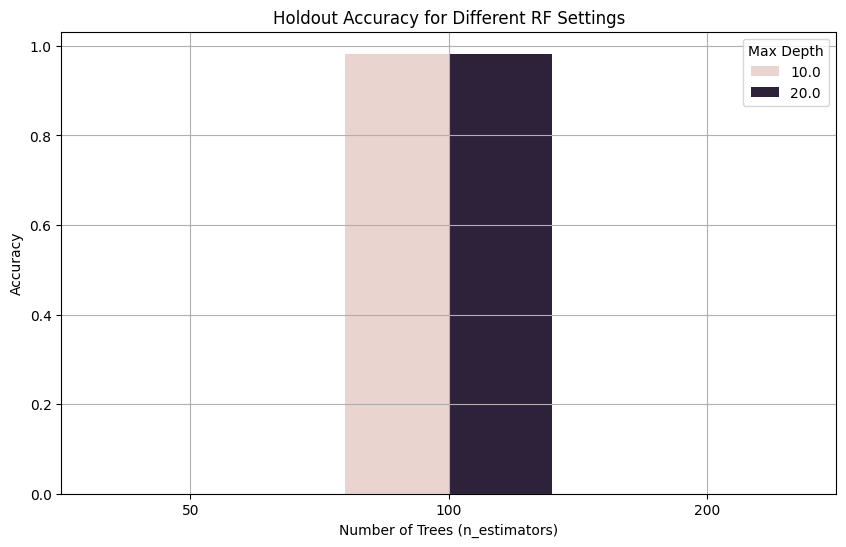

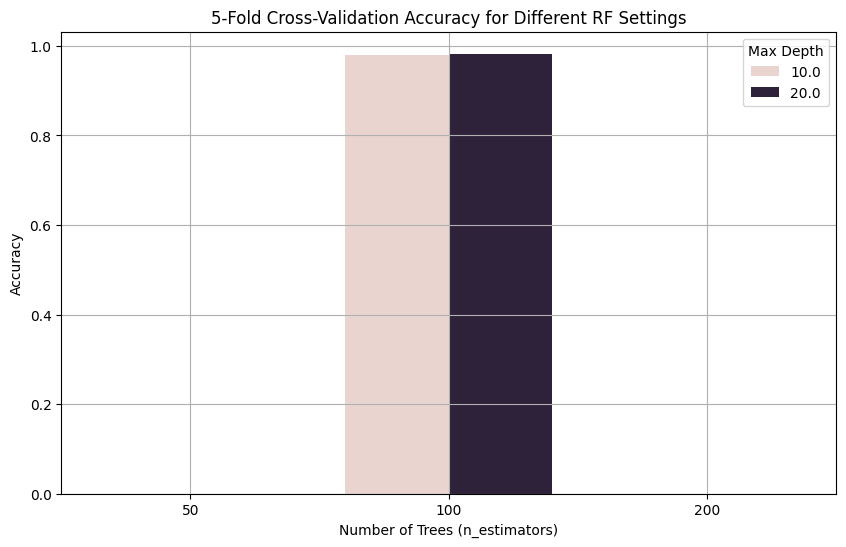

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Step 1: Load Data
file_path = r'C:\Users\USER\Documents\PandasApp\loan-10k.lrn.csv'  # Dataset path 
loan_data = pd.read_csv(file_path)

# Step 2: Preprocessing
# Drop ID column
loan_data_clean = loan_data.drop(columns=['ID'])

# Identify features and target
target_column = 'loan_status'
X = loan_data_clean.drop(columns=[target_column])
y = loan_data_clean[target_column]

# Encode categorical features
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Scale numerical features
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 3: Define Random Forest Settings for Experiments
rf_settings = [
    {"n_estimators": 50, "max_depth": None},
    {"n_estimators": 100, "max_depth": None},
    {"n_estimators": 200, "max_depth": None},
    {"n_estimators": 100, "max_depth": 10},
    {"n_estimators": 100, "max_depth": 20},
]

# Step 4: Train and Evaluate Random Forests with Different Settings
rf_results = []

for setting in rf_settings:
    # Create the Random Forest model
    rf_model = RandomForestClassifier(
        n_estimators=setting["n_estimators"],
        max_depth=setting["max_depth"],
        random_state=42,
        n_jobs=-1
    )

    # Train and evaluate on holdout validation set
    start_time_holdout = time.time()
    rf_model.fit(X_train, y_train)
    y_pred_val = rf_model.predict(X_val)
    holdout_accuracy = accuracy_score(y_val, y_pred_val)
    holdout_time = time.time() - start_time_holdout

    # Evaluate with 5-fold Cross-Validation
    start_time_cv = time.time()
    cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    cross_val_accuracy = np.mean(cv_scores)
    cross_val_time = time.time() - start_time_cv

    # Save results
    rf_results.append({
        "n_estimators": setting["n_estimators"],
        "max_depth": setting["max_depth"],
        "Holdout Accuracy": holdout_accuracy,
        "Holdout Time (s)": holdout_time,
        "CV Accuracy (5-fold)": cross_val_accuracy,
        "CV Time (s)": cross_val_time,
    })

# Step 5: Summarize Results
rf_results_df = pd.DataFrame(rf_results)

# Display the summary
print("\n=== Extended Random Forest Experiment Results ===\n")
print(rf_results_df)

# Optional: plot results
plt.figure(figsize=(10, 6))
sns.barplot(data=rf_results_df, x="n_estimators", y="Holdout Accuracy", hue="max_depth")
plt.title("Holdout Accuracy for Different RF Settings")
plt.ylabel("Accuracy")
plt.xlabel("Number of Trees (n_estimators)")
plt.legend(title="Max Depth")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=rf_results_df, x="n_estimators", y="CV Accuracy (5-fold)", hue="max_depth")
plt.title("5-Fold Cross-Validation Accuracy for Different RF Settings")
plt.ylabel("Accuracy")
plt.xlabel("Number of Trees (n_estimators)")
plt.legend(title="Max Depth")
plt.grid(True)
plt.show()
